In [1]:
import geowombat as gw
from geowombat.util import GeoDownloads

import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import xarray as xr
import dask.array as da

Using TensorFlow backend.


In [2]:
bounds = (-91.57, 40.37, -91.46, 40.42)

bounds = Polygon([(bounds[0], bounds[3]),
                  (bounds[2], bounds[3]),
                  (bounds[2], bounds[1]),
                  (bounds[0], bounds[1])])

bounds = gpd.GeoDataFrame([0],
                          geometry=[bounds],
                          crs={'init': 'epsg:4326'})

bounds = bounds.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
bounds.bounds.values[0].tolist()

[353636.4791642145, 51924.85195243663, 362693.3570040261, 58234.28090210059]

<xarray.DataArray (band: 1, y: 421, x: 604)>
dask.array<open_rasterio-310941a7c257eefc3fb23fa53e9ac694<this-array>, shape=(1, 421, 604), dtype=uint16, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 5.824e+04 5.822e+04 5.821e+04 ... 5.195e+04 5.194e+04
  * x        (x) float64 3.536e+05 3.536e+05 3.537e+05 ... 3.627e+05 3.627e+05
Attributes:
    transform:   (15.0, 0.0, 353625.0, 0.0, -15.0, 58245.0)
    crs:         +proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y...
    res:         (15.0, 15.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)


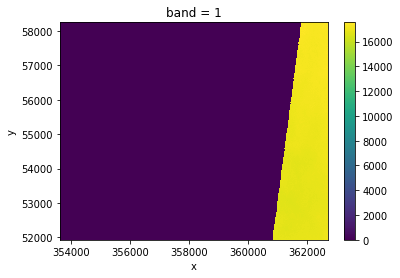

In [6]:
with gw.config.update(ref_bounds=bounds.bounds.values[0].tolist(), 
                      ref_res=(15, 15),
                      ref_crs='+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'):

    with gw.open('/media/jcgr/data/projects/global_fields/data/grids/LC08_L1GT_024032_20170109_20170218_01_T2_B8.TIF') as ds:
        print(ds)  
        
        ds.sel(band=1).plot.imshow()
    
#     with gw.open('/media/jcgr/data/projects/global_fields/data/grids/angles/LC08_L1GT_024032_20170109_20170218_01_T2_sensor_B04.img') as ds:
#         print(ds)
        
#         ds.sel(band=1).plot.imshow()

In [ ]:
gdl = GeoDownloads()

In [ ]:
gdl.download_cube(['l8'], 
                  ['2017-01-01', '2017-03-01'],
                  (-91.57, 40.37, -91.46, 40.42),
                  ['pan'],
                  outdir='/media/jcgr/data/projects/global_fields/data/grids',
                  crs='+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

In [ ]:
qa = '/media/jcgr/data/projects/global_fields/data/grids/LE07_L1GT_025032_20100121_20160916_01_T2_BQA.TIF'

In [ ]:
mask_item = 'cloud'
mask_value = 1

In [ ]:
with gw.open(qa) as ds:
    
    qai = QAMasker(ds, 'l-c1', ['cloud'])

In [ ]:
mask

In [ ]:
mask[self.get_qa_mask(mask_item) >= mask_value] = self.fmask_dict[mask_item]